In [1]:
#this command might be relevant ony on GPU nodes. But the notebook will run on CPU as well
#If running on CPU remove the command wherever it appears
!nvidia-smi

Wed Oct 20 06:33:00 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.74       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8    28W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!apt-get install default-jre
!java -version

Reading package lists... Done
Building dependency tree       
Reading state information... Done
default-jre is already the newest version (2:1.11-68ubuntu1~18.04.1).
default-jre set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
openjdk version "11.0.11" 2021-04-20
OpenJDK Runtime Environment (build 11.0.11+9-Ubuntu-0ubuntu2.18.04)
OpenJDK 64-Bit Server VM (build 11.0.11+9-Ubuntu-0ubuntu2.18.04, mixed mode, sharing)


In [3]:
!pip install h2o

     |████████████████████████████████| 175.8 MB 30 kB/s 
  Created wheel for h2o: filename=h2o-3.34.0.3-py2.py3-none-any.whl size=175832480 sha256=2adf8dae577a5b80656ce35db5713ffec76c87e82c1cc4635cbfe7d105cf109d
  Stored in directory: /root/.cache/pip/wheels/2a/52/cf/01f6938288f0731963463ff72510db67f9f3076f801038b2f7
Successfully built h2o


In [4]:
 import h2o

In [5]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.11" 2021-04-20; OpenJDK Runtime Environment (build 11.0.11+9-Ubuntu-0ubuntu2.18.04); OpenJDK 64-Bit Server VM (build 11.0.11+9-Ubuntu-0ubuntu2.18.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp42hujfid
  JVM stdout: /tmp/tmp42hujfid/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp42hujfid/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.34.0.3
H2O_cluster_version_age:,12 days
H2O_cluster_name:,H2O_from_python_unknownUser_ojunf5
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [6]:
from h2o.automl import H2OAutoML

In [7]:
churn_df = h2o.import_file('WA_Fn-UseC_-Telco-Customer-Churn.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [8]:
churn_df.types

{'Churn': 'enum',
 'Contract': 'enum',
 'Dependents': 'enum',
 'DeviceProtection': 'enum',
 'InternetService': 'enum',
 'MonthlyCharges': 'real',
 'MultipleLines': 'enum',
 'OnlineBackup': 'enum',
 'OnlineSecurity': 'enum',
 'PaperlessBilling': 'enum',
 'Partner': 'enum',
 'PaymentMethod': 'enum',
 'PhoneService': 'enum',
 'SeniorCitizen': 'int',
 'StreamingMovies': 'enum',
 'StreamingTV': 'enum',
 'TechSupport': 'enum',
 'TotalCharges': 'real',
 'customerID': 'string',
 'gender': 'enum',
 'tenure': 'int'}

In [9]:
churn_df.describe()

Rows:7043
Cols:21




,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
type,string,enum,int,enum,enum,int,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,real,real,enum
mins,NaN,,0.0,,,0.0,,,,,,,,,,,,,18.25,18.8,
mean,NaN,,0.1621468124378816,,,32.37114865824223,,,,,,,,,,,,,64.76169246059916,2283.300440841865,
maxs,NaN,,1.0,,,72.0,,,,,,,,,,,,,118.75,8684.8,
sigma,NaN,,0.3686116056100131,,,24.559481023094456,,,,,,,,,,,,,30.090047097678482,2266.771361883145,
zeros,0,,5901,,,11,,,,,,,,,,,,,0,0,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [10]:
churn_train,churn_test,churn_valid = churn_df.split_frame(ratios=[.7, .15])

In [11]:
churn_train

customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No
9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No
7469-LKBCI,Male,0,No,No,16,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),18.95,326.8,No
3655-SNQYZ,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No
8191-XWSZG,Female,0,No,No,52,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,1022.95,No


In [12]:
y = "Churn"
x = churn_df.columns
x.remove(y)
x.remove("customerID")

In [13]:
aml = H2OAutoML(max_models = 10, seed = 10, exclude_algos = ["StackedEnsemble", "DeepLearning"], verbosity="info", nfolds=0)


In [14]:
!nvidia-smi

Wed Oct 20 06:33:50 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.74       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8    27W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [15]:
aml.train(x = x, y = y, training_frame = churn_train, validation_frame=churn_valid)

AutoML progress: |
06:33:51.152: Project: AutoML_1_20211020_63351
06:33:51.153: Cross-validation disabled by user: no fold column nor nfolds > 1.
06:33:51.171: Setting stopping tolerance adaptively based on the training frame: 0.014281343114939598
06:33:51.171: Build control seed: 10
06:33:51.172: Since cross-validation is disabled, and no leaderboard frame was provided, automatically split the training data into training and leaderboard frames in the ratio 90/10
06:33:51.310: training frame: Frame key: AutoML_1_20211020_63351_training_py_2_sid_be07    cols: 21    rows: 4430  chunks: 8    size: 293898  checksum: -375494618470698922
06:33:51.310: validation frame: Frame key: py_4_sid_be07    cols: 21    rows: 1076  chunks: 8    size: 139586  checksum: -7997565117362478936
06:33:51.323: leaderboard frame: Frame key: AutoML_1_20211020_63351_leaderboard_py_2_sid_be07    cols: 21    rows: 473  chunks: 8    size: 124273  checksum: 5615222043198486164
06:33:51.324: blending frame: NULL
06:33:

,,family,link,regularization,lambda_search,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,binomial,logit,Ridge ( lambda = 0.002942 ),"nlambda = 30, lambda.max = 15.589, lambda.min = 0.002942, lambda.1...",45,45,38,AutoML_1_20211020_63351_training_py_2_sid_be07




ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.13513184636386374
RMSE: 0.3676028378071417
LogLoss: 0.41635055093929313
Null degrees of freedom: 4429
Residual degrees of freedom: 4384
Null deviance: 5133.321327244056
Residual deviance: 3688.8658813221373
AIC: 3780.8658813221373
AUC: 0.8463763612631489
AUCPR: 0.6562647506654106
Gini: 0.6927527225262977

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3007292428039511: 


,,No,Yes,Error,Rate
0,No,2498.0,753.0,0.2316,(753.0/3251.0)
1,Yes,272.0,907.0,0.2307,(272.0/1179.0)
2,Total,2770.0,1660.0,0.2314,(1025.0/4430.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.300729,0.638957,219.0
1,max f2,0.143316,0.753453,302.0
2,max f0point5,0.520337,0.635036,122.0
3,max accuracy,0.520337,0.804740,122.0
4,max precision,0.819835,0.900000,2.0
5,max recall,0.007636,1.000000,396.0
6,max specificity,0.840397,0.999692,0.0
7,max absolute_mcc,0.354090,0.493019,195.0
8,max min_per_class_accuracy,0.300729,0.768379,219.0
9,max mean_per_class_accuracy,0.240071,0.770616,249.0



Gains/Lift Table: Avg response rate: 26.61 %, avg score: 26.61 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010158,0.783253,3.339930,3.339930,0.888889,0.803987,0.888889,0.803987,0.033927,0.033927,233.993026,233.993026,0.032389
1,2,0.020090,0.760966,3.245046,3.293021,0.863636,0.773512,0.876404,0.788920,0.032231,0.066158,224.504588,229.302113,0.062774
2,3,0.030023,0.745034,2.988858,3.192396,0.795455,0.752030,0.849624,0.776716,0.029686,0.095844,198.885805,219.239575,0.089692
3,4,0.040181,0.732657,2.755442,3.081930,0.733333,0.738788,0.820225,0.767128,0.027990,0.123834,175.544247,208.193003,0.113991
4,5,0.050113,0.715712,2.818066,3.029633,0.750000,0.722393,0.806306,0.758261,0.027990,0.151824,181.806616,202.963269,0.138597
5,6,0.100000,0.652779,2.652298,2.841391,0.705882,0.685782,0.756208,0.722104,0.132316,0.284139,165.229756,184.139101,0.250919
6,7,0.150113,0.585987,2.386470,2.689523,0.635135,0.619162,0.715789,0.687738,0.119593,0.403732,138.647044,168.952279,0.345596
7,8,0.200000,0.523690,2.023227,2.523325,0.538462,0.556041,0.671558,0.654888,0.100933,0.504665,102.322699,152.332485,0.415154
8,9,0.300000,0.389484,1.594572,2.213740,0.424379,0.454996,0.589165,0.588257,0.159457,0.664122,59.457167,121.374046,0.496174
9,10,0.400000,0.271023,1.289228,1.982612,0.343115,0.329280,0.527652,0.523513,0.128923,0.793045,28.922816,98.261238,0.535586




ModelMetricsBinomialGLM: glm
** Reported on validation data. **

MSE: 0.1389320373698802
RMSE: 0.3727358815164971
LogLoss: 0.42555209863203436
Null degrees of freedom: 1075
Residual degrees of freedom: 1030
Null deviance: 1239.99984795417
Residual deviance: 915.788116256138
AIC: 1007.788116256138
AUC: 0.8366470753367585
AUCPR: 0.6393480260128064
Gini: 0.6732941506735171

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.29184732722962026: 


,,No,Yes,Error,Rate
0,No,595.0,198.0,0.2497,(198.0/793.0)
1,Yes,68.0,215.0,0.2403,(68.0/283.0)
2,Total,663.0,413.0,0.2472,(266.0/1076.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.291847,0.617816,213.0
1,max f2,0.139379,0.755149,291.0
2,max f0point5,0.523478,0.629569,120.0
3,max accuracy,0.523478,0.804833,120.0
4,max precision,0.845400,1.000000,0.0
5,max recall,0.020112,1.000000,381.0
6,max specificity,0.845400,1.000000,0.0
7,max absolute_mcc,0.491767,0.473721,133.0
8,max min_per_class_accuracy,0.298081,0.752650,210.0
9,max mean_per_class_accuracy,0.172179,0.756075,272.0



Gains/Lift Table: Avg response rate: 26.30 %, avg score: 27.02 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010223,0.804651,3.456473,3.456473,0.909091,0.822849,0.909091,0.822849,0.035336,0.035336,245.647286,245.647286,0.034075
1,2,0.020446,0.762352,3.110826,3.283649,0.818182,0.780224,0.863636,0.801537,0.031802,0.067138,211.082557,228.364921,0.063355
2,3,0.030669,0.748558,2.073884,2.880394,0.545455,0.755613,0.757576,0.786229,0.021201,0.088339,107.388371,188.039405,0.078251
3,4,0.040892,0.731260,3.456473,3.024414,0.909091,0.737936,0.795455,0.774156,0.035336,0.123675,245.647286,202.441375,0.112326
4,5,0.050186,0.715715,3.041696,3.027614,0.800000,0.723004,0.796296,0.764683,0.028269,0.151943,204.169611,202.761419,0.138072
5,6,0.100372,0.657972,2.605156,2.816385,0.685185,0.689499,0.740741,0.727091,0.130742,0.282686,160.515639,181.638529,0.247377
6,7,0.150558,0.606563,2.253108,2.628626,0.592593,0.627980,0.691358,0.694054,0.113074,0.395760,125.310823,162.862627,0.332708
7,8,0.200743,0.548194,2.182699,2.517144,0.574074,0.575215,0.662037,0.664345,0.109541,0.505300,118.269860,151.714435,0.413245
8,9,0.300186,0.421978,1.421353,2.154142,0.373832,0.485804,0.566563,0.605200,0.141343,0.646643,42.135332,115.414237,0.470098
9,10,0.400558,0.267371,1.232169,1.923114,0.324074,0.334892,0.505800,0.537466,0.123675,0.770318,23.216856,92.311413,0.501718




Scoring History: 


,,timestamp,duration,iteration,lambda,predictors,deviance_train,deviance_test,alpha,iterations,training_rmse,training_logloss,training_r2,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_r2,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2021-10-20 06:33:56,0.000 sec,2,.16E2,46.0,1.14556,1.1393,0,NaN,,,,,,,,,,,,,,
1,,2021-10-20 06:33:56,0.089 sec,4,.97E1,46.0,1.138,1.1318,0,NaN,,,,,,,,,,,,,,
2,,2021-10-20 06:33:55,2.365 sec,5,None,NaN,,,,5.0,0.367603,0.416351,0.308114,0.846376,0.656265,3.33993,0.231377,0.372736,0.425552,0.283251,0.836647,0.639348,3.45647,0.247212
3,,2021-10-20 06:33:56,0.174 sec,6,.6E1,46.0,1.12655,1.12045,0,NaN,,,,,,,,,,,,,,
4,,2021-10-20 06:33:56,0.252 sec,8,.37E1,46.0,1.10977,1.10385,0,NaN,,,,,,,,,,,,,,
5,,2021-10-20 06:33:56,0.323 sec,10,.23E1,46.0,1.08638,1.08077,0,NaN,,,,,,,,,,,,,,
6,,2021-10-20 06:33:56,0.409 sec,12,.14E1,46.0,1.05597,1.05092,0,NaN,,,,,,,,,,,,,,
7,,2021-10-20 06:33:56,0.473 sec,14,.89E0,46.0,1.01983,1.01571,0,NaN,,,,,,,,,,,,,,
8,,2021-10-20 06:33:56,0.560 sec,16,.56E0,46.0,0.981177,0.978514,0,NaN,,,,,,,,,,,,,,
9,,2021-10-20 06:33:56,0.620 sec,18,.34E0,46.0,0.944183,0.943556,0,NaN,,,,,,,,,,,,,,



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,tenure,1.041473,1.000000,0.146576
1,Contract.Month-to-month,0.560955,0.538617,0.078948
2,Contract.Two year,0.480488,0.461354,0.067623
3,InternetService.Fiber optic,0.376828,0.361822,0.053034
4,TotalCharges,0.309622,0.297292,0.043576
5,InternetService.DSL,0.307909,0.295648,0.043335
6,PaymentMethod.Electronic check,0.271428,0.260619,0.038200
7,OnlineSecurity.No,0.247585,0.237726,0.034845
8,TechSupport.No,0.241661,0.232037,0.034011
9,OnlineSecurity.Yes,0.180322,0.173142,0.025378



See the whole table with table.as_data_frame()


In [16]:
!nvidia-smi

Wed Oct 20 06:34:23 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.74       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P0    59W / 149W |     82MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [17]:
lb = aml.leaderboard

In [18]:
lb.head()

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GLM_1_AutoML_1_20211020_63351,0.852172,0.403605,0.668881,0.220822,0.35923,0.129046
GBM_1_AutoML_1_20211020_63351,0.84784,0.406133,0.665699,0.227314,0.361606,0.130759
XRT_1_AutoML_1_20211020_63351,0.845928,0.41715,0.630694,0.225153,0.366879,0.1346
XGBoost_1_AutoML_1_20211020_63351,0.843827,0.418696,0.635082,0.217564,0.367258,0.134879
GBM_2_AutoML_1_20211020_63351,0.84241,0.41482,0.658177,0.224068,0.364169,0.132619
XGBoost_3_AutoML_1_20211020_63351,0.840309,0.420064,0.657147,0.240734,0.368181,0.135557
GBM_3_AutoML_1_20211020_63351,0.839601,0.420187,0.631838,0.229568,0.367789,0.135269
DRF_1_AutoML_1_20211020_63351,0.837181,0.48989,0.622019,0.238987,0.369988,0.136891
GBM_4_AutoML_1_20211020_63351,0.836532,0.423892,0.630853,0.223902,0.368297,0.135643
XGBoost_2_AutoML_1_20211020_63351,0.828647,0.439466,0.622957,0.234478,0.378999,0.14364


In [19]:
churn_pred=aml.leader.predict(churn_test)

glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [20]:
churn_pred.head()

predict,No,Yes
No,0.784691,0.215309
No,0.825784,0.174216
Yes,0.520447,0.479553
No,0.884204,0.115796
No,0.743365,0.256635
No,0.957454,0.0425462
No,0.988341,0.0116592
No,0.802418,0.197582
No,0.974857,0.0251426
No,0.834331,0.165669


In [21]:
aml.leader.model_performance(churn_test)


ModelMetricsBinomialGLM: glm
** Reported on test data. **

MSE: 0.13196777376125815
RMSE: 0.3632736898830662
LogLoss: 0.40657993805269693
Null degrees of freedom: 1063
Residual degrees of freedom: 1018
Null deviance: 1240.6877294866556
Residual deviance: 865.2021081761391
AIC: 957.2021081761391
AUC: 0.8564948721743146
AUCPR: 0.6805862515686546
Gini: 0.7129897443486293

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.31677091184956996: 


,,No,Yes,Error,Rate
0,No,611.0,166.0,0.2136,(166.0/777.0)
1,Yes,65.0,222.0,0.2265,(65.0/287.0)
2,Total,676.0,388.0,0.2171,(231.0/1064.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.316771,0.657778,197.0
1,max f2,0.186119,0.759193,263.0
2,max f0point5,0.596885,0.658037,83.0
3,max accuracy,0.486223,0.811090,125.0
4,max precision,0.841513,1.000000,0.0
5,max recall,0.018958,1.000000,382.0
6,max specificity,0.841513,1.000000,0.0
7,max absolute_mcc,0.403454,0.523154,158.0
8,max min_per_class_accuracy,0.308191,0.778636,201.0
9,max mean_per_class_accuracy,0.297604,0.781116,205.0



Gains/Lift Table: Avg response rate: 26.97 %, avg score: 26.60 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010338,0.790045,3.370288,3.370288,0.909091,0.816754,0.909091,0.816754,0.034843,0.034843,237.028825,237.028825,0.033556
1,2,0.020677,0.768551,3.033259,3.201774,0.818182,0.779576,0.863636,0.798165,0.031359,0.066202,203.325942,220.177384,0.062341
2,3,0.030075,0.751462,2.595122,3.012195,0.700000,0.755039,0.812500,0.784688,0.024390,0.090592,159.512195,201.219512,0.082870
3,4,0.040414,0.735245,3.370288,3.103800,0.909091,0.742037,0.837209,0.773777,0.034843,0.125436,237.028825,210.380034,0.116427
4,5,0.050752,0.719420,3.033259,3.089431,0.818182,0.728036,0.833333,0.764460,0.031359,0.156794,203.325942,208.943089,0.145211
5,6,0.100564,0.647501,2.658076,2.875769,0.716981,0.683166,0.775701,0.724193,0.132404,0.289199,165.807639,187.576932,0.258311
6,7,0.150376,0.596357,2.728026,2.826829,0.735849,0.620059,0.762500,0.689698,0.135889,0.425087,172.802577,182.682927,0.376181
7,8,0.200188,0.519788,1.818684,2.575976,0.490566,0.558361,0.694836,0.657018,0.090592,0.515679,81.868385,157.597618,0.432024
8,9,0.299812,0.387958,1.713760,2.289472,0.462264,0.455087,0.617555,0.589919,0.170732,0.686411,71.375978,128.947167,0.529397
9,10,0.400376,0.271642,1.178026,2.010306,0.317757,0.327451,0.542254,0.523994,0.118467,0.804878,17.802599,101.030574,0.553913


In [22]:
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
#se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])
#metalearner = h2o.get_model(se.metalearner()['name'])

In [23]:
model_ids

['GLM_1_AutoML_1_20211020_63351',
 'GBM_1_AutoML_1_20211020_63351',
 'XRT_1_AutoML_1_20211020_63351',
 'XGBoost_1_AutoML_1_20211020_63351',
 'GBM_2_AutoML_1_20211020_63351',
 'XGBoost_3_AutoML_1_20211020_63351',
 'GBM_3_AutoML_1_20211020_63351',
 'DRF_1_AutoML_1_20211020_63351',
 'GBM_4_AutoML_1_20211020_63351',
 'XGBoost_2_AutoML_1_20211020_63351']

In [24]:
h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_1_AutoML_1_20211020_63351


Model Summary: 


,,number_of_trees
0,,30.0




ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.1064733809966021
RMSE: 0.32630259115827154
LogLoss: 0.33923669150753544
Mean Per-Class Error: 0.17125793355420882
AUC: 0.9065070080870269
AUCPR: 0.7899511314016933
Gini: 0.8130140161740538

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3834702730178833: 


,,No,Yes,Error,Rate
0,No,2837.0,414.0,0.1273,(414.0/3251.0)
1,Yes,279.0,900.0,0.2366,(279.0/1179.0)
2,Total,3116.0,1314.0,0.1564,(693.0/4430.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.383470,0.722022,197.0
1,max f2,0.173299,0.798834,287.0
2,max f0point5,0.572133,0.745584,124.0
3,max accuracy,0.492075,0.850339,153.0
4,max precision,0.972448,1.000000,0.0
5,max recall,0.009771,1.000000,394.0
6,max specificity,0.972448,1.000000,0.0
7,max absolute_mcc,0.398878,0.616067,191.0
8,max min_per_class_accuracy,0.312908,0.825592,223.0
9,max mean_per_class_accuracy,0.291664,0.828742,232.0



Gains/Lift Table: Avg response rate: 26.61 %, avg score: 26.78 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010158,0.924431,3.757422,3.757422,1.000000,0.942699,1.000000,0.942699,0.038168,0.038168,275.742154,275.742154,0.038168
1,2,0.020316,0.898696,3.506927,3.632174,0.933333,0.910855,0.966667,0.926777,0.035623,0.073791,250.692677,263.217416,0.072869
2,3,0.030023,0.877401,3.407894,3.559663,0.906977,0.888863,0.947368,0.914519,0.033079,0.106870,240.789396,255.966252,0.104717
3,4,0.040181,0.852949,3.506927,3.546330,0.933333,0.861453,0.943820,0.901104,0.035623,0.142494,250.692677,254.633045,0.139418
4,5,0.050113,0.827202,3.159650,3.469691,0.840909,0.838283,0.923423,0.888653,0.031383,0.173876,215.964993,246.969107,0.168647
5,6,0.100000,0.698109,3.264366,3.367260,0.868778,0.760684,0.896163,0.824813,0.162850,0.336726,226.436623,236.726039,0.322577
6,7,0.150113,0.618760,2.809603,3.181095,0.747748,0.657808,0.846617,0.769061,0.140797,0.477523,180.960350,218.109523,0.446148
7,8,0.200000,0.528227,2.278256,2.955895,0.606335,0.576936,0.786682,0.721138,0.113656,0.591179,127.825560,195.589483,0.533043
8,9,0.300000,0.375577,1.755725,2.555838,0.467269,0.453530,0.680211,0.631935,0.175573,0.766751,75.572519,155.583828,0.636022
9,10,0.400000,0.257393,1.102629,2.192536,0.293454,0.314823,0.583521,0.552657,0.110263,0.877014,10.262935,119.253605,0.650007




ModelMetricsBinomial: xgboost
** Reported on validation data. **

MSE: 0.1429772294631665
RMSE: 0.37812329928631283
LogLoss: 0.43563418946518573
Mean Per-Class Error: 0.244326460772038
AUC: 0.8314737165747998
AUCPR: 0.6310179323262619
Gini: 0.6629474331495997

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3308422863483429: 


,,No,Yes,Error,Rate
0,No,634.0,159.0,0.2005,(159.0/793.0)
1,Yes,86.0,197.0,0.3039,(86.0/283.0)
2,Total,720.0,356.0,0.2277,(245.0/1076.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.330842,0.616588,208.0
1,max f2,0.118670,0.748417,310.0
2,max f0point5,0.559872,0.598749,126.0
3,max accuracy,0.565057,0.791822,125.0
4,max precision,0.979722,1.000000,0.0
5,max recall,0.014539,1.000000,388.0
6,max specificity,0.979722,1.000000,0.0
7,max absolute_mcc,0.330842,0.463743,208.0
8,max min_per_class_accuracy,0.278012,0.749054,232.0
9,max mean_per_class_accuracy,0.188368,0.755674,270.0



Gains/Lift Table: Avg response rate: 26.30 %, avg score: 27.07 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010223,0.929916,3.802120,3.802120,1.000000,0.948210,1.000000,0.948210,0.038869,0.038869,280.212014,280.212014,0.038869
1,2,0.020446,0.910216,2.419531,3.110826,0.636364,0.922777,0.818182,0.935494,0.024735,0.063604,141.953100,211.082557,0.058560
2,3,0.030669,0.879053,3.110826,3.110826,0.818182,0.891143,0.818182,0.920710,0.031802,0.095406,211.082557,211.082557,0.087840
3,4,0.040892,0.851636,2.765178,3.024414,0.727273,0.867973,0.795455,0.907526,0.028269,0.123675,176.517828,202.441375,0.112326
4,5,0.050186,0.830278,3.421908,3.098024,0.900000,0.840072,0.814815,0.895034,0.031802,0.155477,242.190813,209.802382,0.142867
5,6,0.100372,0.704900,2.534747,2.816385,0.666667,0.771108,0.740741,0.833071,0.127208,0.282686,153.474676,181.638529,0.247377
6,7,0.150558,0.618782,1.901060,2.511277,0.500000,0.663307,0.660494,0.776483,0.095406,0.378092,90.106007,151.127688,0.308735
7,8,0.200743,0.549691,2.041879,2.393927,0.537037,0.586812,0.629630,0.729065,0.102473,0.480565,104.187934,139.392750,0.379683
8,9,0.300186,0.375852,1.705624,2.165914,0.448598,0.470137,0.569659,0.643290,0.169611,0.650177,70.562399,116.591364,0.474893
9,10,0.400558,0.254342,1.232169,1.931936,0.324074,0.311877,0.508121,0.560245,0.123675,0.773852,23.216856,93.193576,0.506512




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2021-10-20 06:33:51,0.515 sec,0.0,0.500000,0.693147,0.500000,0.266140,1.000000,0.733860,0.500000,0.693147,0.500000,0.263011,1.000000,0.736989
1,,2021-10-20 06:33:52,1.148 sec,5.0,0.363727,0.424144,0.865884,0.706118,3.600862,0.199774,0.376062,0.444087,0.842101,0.634903,3.168433,0.214684
2,,2021-10-20 06:33:53,1.631 sec,10.0,0.348808,0.384251,0.876479,0.731374,3.757422,0.189616,0.373202,0.425959,0.839243,0.626812,3.110826,0.236059
3,,2021-10-20 06:33:53,1.973 sec,15.0,0.340989,0.366278,0.887058,0.751368,3.673923,0.188488,0.376032,0.429911,0.834918,0.627284,3.110826,0.227695
4,,2021-10-20 06:33:53,2.387 sec,20.0,0.335544,0.355998,0.894064,0.763994,3.673923,0.178781,0.375437,0.429834,0.835916,0.628917,3.110826,0.213755
5,,2021-10-20 06:33:54,2.749 sec,25.0,0.330654,0.346867,0.900550,0.777618,3.673923,0.174041,0.377022,0.434248,0.833383,0.632384,3.802120,0.243494
6,,2021-10-20 06:33:54,3.029 sec,30.0,0.326303,0.339237,0.906507,0.789951,3.757422,0.156433,0.378123,0.435634,0.831474,0.631018,3.802120,0.227695



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Contract.Month-to-month,703.895813,1.000000,0.211361
1,TotalCharges,580.176880,0.824237,0.174212
2,MonthlyCharges,420.587402,0.597514,0.126291
3,tenure,389.304901,0.553072,0.116898
4,TechSupport.No,255.266479,0.362648,0.076650
5,OnlineSecurity.No,115.765228,0.164464,0.034761
6,InternetService.DSL,75.753960,0.107621,0.022747
7,PaymentMethod.Electronic check,70.003494,0.099451,0.021020
8,OnlineBackup.No,68.744019,0.097662,0.020642
9,gender.Female,64.331619,0.091394,0.019317



See the whole table with table.as_data_frame()


In [25]:
out = h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])

In [26]:
out.params

{'auc_type': {'actual': 'AUTO', 'default': 'AUTO', 'input': 'AUTO'},
 'backend': {'actual': 'gpu', 'default': 'auto', 'input': 'auto'},
 'booster': {'actual': 'gbtree', 'default': 'gbtree', 'input': 'gbtree'},
 'build_tree_one_node': {'actual': False, 'default': False, 'input': False},
 'calibrate_model': {'actual': False, 'default': False, 'input': False},
 'calibration_frame': {'actual': None, 'default': None, 'input': None},
 'categorical_encoding': {'actual': 'OneHotInternal',
  'default': 'AUTO',
  'input': 'AUTO'},
 'checkpoint': {'actual': None, 'default': None, 'input': None},
 'col_sample_rate': {'actual': 0.8, 'default': 1.0, 'input': 0.8},
 'col_sample_rate_per_tree': {'actual': 0.8, 'default': 1.0, 'input': 0.8},
 'colsample_bylevel': {'actual': 0.8, 'default': 1.0, 'input': 1.0},
 'colsample_bynode': {'actual': 1.0, 'default': 1.0, 'input': 1.0},
 'colsample_bytree': {'actual': 0.8, 'default': 1.0, 'input': 1.0},
 'distribution': {'actual': 'bernoulli',
  'default': 'AUTO'

In [27]:
out.convert_H2OXGBoostParams_2_XGBoostParams()

({'alpha': 0.0,
  'booster': 'gbtree',
  'colsample_bylevel': 0.8,
  'colsample_bytree': 0.8,
  'eta': 0.3,
  'gamma': 0.0,
  'gpu_id': 0,
  'grow_policy': 'depthwise',
  'lambda': 1.0,
  'max_bin': 256,
  'max_delta_step': 0.0,
  'max_depth': 15,
  'min_child_weight': 10.0,
  'nround': 10000,
  'nthread': 2,
  'objective': 'binary:logistic',
  'seed': 10,
  'silent': True,
  'subsample': 0.6,
  'updater': 'grow_gpu_hist'},
 10000)

In [28]:
out

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_1_AutoML_1_20211020_63351


Model Summary: 


,,number_of_trees
0,,30.0




ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.1064733809966021
RMSE: 0.32630259115827154
LogLoss: 0.33923669150753544
Mean Per-Class Error: 0.17125793355420882
AUC: 0.9065070080870269
AUCPR: 0.7899511314016933
Gini: 0.8130140161740538

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3834702730178833: 


,,No,Yes,Error,Rate
0,No,2837.0,414.0,0.1273,(414.0/3251.0)
1,Yes,279.0,900.0,0.2366,(279.0/1179.0)
2,Total,3116.0,1314.0,0.1564,(693.0/4430.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.383470,0.722022,197.0
1,max f2,0.173299,0.798834,287.0
2,max f0point5,0.572133,0.745584,124.0
3,max accuracy,0.492075,0.850339,153.0
4,max precision,0.972448,1.000000,0.0
5,max recall,0.009771,1.000000,394.0
6,max specificity,0.972448,1.000000,0.0
7,max absolute_mcc,0.398878,0.616067,191.0
8,max min_per_class_accuracy,0.312908,0.825592,223.0
9,max mean_per_class_accuracy,0.291664,0.828742,232.0



Gains/Lift Table: Avg response rate: 26.61 %, avg score: 26.78 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010158,0.924431,3.757422,3.757422,1.000000,0.942699,1.000000,0.942699,0.038168,0.038168,275.742154,275.742154,0.038168
1,2,0.020316,0.898696,3.506927,3.632174,0.933333,0.910855,0.966667,0.926777,0.035623,0.073791,250.692677,263.217416,0.072869
2,3,0.030023,0.877401,3.407894,3.559663,0.906977,0.888863,0.947368,0.914519,0.033079,0.106870,240.789396,255.966252,0.104717
3,4,0.040181,0.852949,3.506927,3.546330,0.933333,0.861453,0.943820,0.901104,0.035623,0.142494,250.692677,254.633045,0.139418
4,5,0.050113,0.827202,3.159650,3.469691,0.840909,0.838283,0.923423,0.888653,0.031383,0.173876,215.964993,246.969107,0.168647
5,6,0.100000,0.698109,3.264366,3.367260,0.868778,0.760684,0.896163,0.824813,0.162850,0.336726,226.436623,236.726039,0.322577
6,7,0.150113,0.618760,2.809603,3.181095,0.747748,0.657808,0.846617,0.769061,0.140797,0.477523,180.960350,218.109523,0.446148
7,8,0.200000,0.528227,2.278256,2.955895,0.606335,0.576936,0.786682,0.721138,0.113656,0.591179,127.825560,195.589483,0.533043
8,9,0.300000,0.375577,1.755725,2.555838,0.467269,0.453530,0.680211,0.631935,0.175573,0.766751,75.572519,155.583828,0.636022
9,10,0.400000,0.257393,1.102629,2.192536,0.293454,0.314823,0.583521,0.552657,0.110263,0.877014,10.262935,119.253605,0.650007




ModelMetricsBinomial: xgboost
** Reported on validation data. **

MSE: 0.1429772294631665
RMSE: 0.37812329928631283
LogLoss: 0.43563418946518573
Mean Per-Class Error: 0.244326460772038
AUC: 0.8314737165747998
AUCPR: 0.6310179323262619
Gini: 0.6629474331495997

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3308422863483429: 


,,No,Yes,Error,Rate
0,No,634.0,159.0,0.2005,(159.0/793.0)
1,Yes,86.0,197.0,0.3039,(86.0/283.0)
2,Total,720.0,356.0,0.2277,(245.0/1076.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.330842,0.616588,208.0
1,max f2,0.118670,0.748417,310.0
2,max f0point5,0.559872,0.598749,126.0
3,max accuracy,0.565057,0.791822,125.0
4,max precision,0.979722,1.000000,0.0
5,max recall,0.014539,1.000000,388.0
6,max specificity,0.979722,1.000000,0.0
7,max absolute_mcc,0.330842,0.463743,208.0
8,max min_per_class_accuracy,0.278012,0.749054,232.0
9,max mean_per_class_accuracy,0.188368,0.755674,270.0



Gains/Lift Table: Avg response rate: 26.30 %, avg score: 27.07 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010223,0.929916,3.802120,3.802120,1.000000,0.948210,1.000000,0.948210,0.038869,0.038869,280.212014,280.212014,0.038869
1,2,0.020446,0.910216,2.419531,3.110826,0.636364,0.922777,0.818182,0.935494,0.024735,0.063604,141.953100,211.082557,0.058560
2,3,0.030669,0.879053,3.110826,3.110826,0.818182,0.891143,0.818182,0.920710,0.031802,0.095406,211.082557,211.082557,0.087840
3,4,0.040892,0.851636,2.765178,3.024414,0.727273,0.867973,0.795455,0.907526,0.028269,0.123675,176.517828,202.441375,0.112326
4,5,0.050186,0.830278,3.421908,3.098024,0.900000,0.840072,0.814815,0.895034,0.031802,0.155477,242.190813,209.802382,0.142867
5,6,0.100372,0.704900,2.534747,2.816385,0.666667,0.771108,0.740741,0.833071,0.127208,0.282686,153.474676,181.638529,0.247377
6,7,0.150558,0.618782,1.901060,2.511277,0.500000,0.663307,0.660494,0.776483,0.095406,0.378092,90.106007,151.127688,0.308735
7,8,0.200743,0.549691,2.041879,2.393927,0.537037,0.586812,0.629630,0.729065,0.102473,0.480565,104.187934,139.392750,0.379683
8,9,0.300186,0.375852,1.705624,2.165914,0.448598,0.470137,0.569659,0.643290,0.169611,0.650177,70.562399,116.591364,0.474893
9,10,0.400558,0.254342,1.232169,1.931936,0.324074,0.311877,0.508121,0.560245,0.123675,0.773852,23.216856,93.193576,0.506512




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2021-10-20 06:33:51,0.515 sec,0.0,0.500000,0.693147,0.500000,0.266140,1.000000,0.733860,0.500000,0.693147,0.500000,0.263011,1.000000,0.736989
1,,2021-10-20 06:33:52,1.148 sec,5.0,0.363727,0.424144,0.865884,0.706118,3.600862,0.199774,0.376062,0.444087,0.842101,0.634903,3.168433,0.214684
2,,2021-10-20 06:33:53,1.631 sec,10.0,0.348808,0.384251,0.876479,0.731374,3.757422,0.189616,0.373202,0.425959,0.839243,0.626812,3.110826,0.236059
3,,2021-10-20 06:33:53,1.973 sec,15.0,0.340989,0.366278,0.887058,0.751368,3.673923,0.188488,0.376032,0.429911,0.834918,0.627284,3.110826,0.227695
4,,2021-10-20 06:33:53,2.387 sec,20.0,0.335544,0.355998,0.894064,0.763994,3.673923,0.178781,0.375437,0.429834,0.835916,0.628917,3.110826,0.213755
5,,2021-10-20 06:33:54,2.749 sec,25.0,0.330654,0.346867,0.900550,0.777618,3.673923,0.174041,0.377022,0.434248,0.833383,0.632384,3.802120,0.243494
6,,2021-10-20 06:33:54,3.029 sec,30.0,0.326303,0.339237,0.906507,0.789951,3.757422,0.156433,0.378123,0.435634,0.831474,0.631018,3.802120,0.227695



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Contract.Month-to-month,703.895813,1.000000,0.211361
1,TotalCharges,580.176880,0.824237,0.174212
2,MonthlyCharges,420.587402,0.597514,0.126291
3,tenure,389.304901,0.553072,0.116898
4,TechSupport.No,255.266479,0.362648,0.076650
5,OnlineSecurity.No,115.765228,0.164464,0.034761
6,InternetService.DSL,75.753960,0.107621,0.022747
7,PaymentMethod.Electronic check,70.003494,0.099451,0.021020
8,OnlineBackup.No,68.744019,0.097662,0.020642
9,gender.Female,64.331619,0.091394,0.019317



See the whole table with table.as_data_frame()


In [29]:
out_gbm = h2o.get_model([mid for mid in model_ids if "GBM" in mid][0])

In [30]:
out.confusion_matrix()


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3834702730178833: 


,,No,Yes,Error,Rate
0,No,2837.0,414.0,0.1273,(414.0/3251.0)
1,Yes,279.0,900.0,0.2366,(279.0/1179.0)
2,Total,3116.0,1314.0,0.1564,(693.0/4430.0)


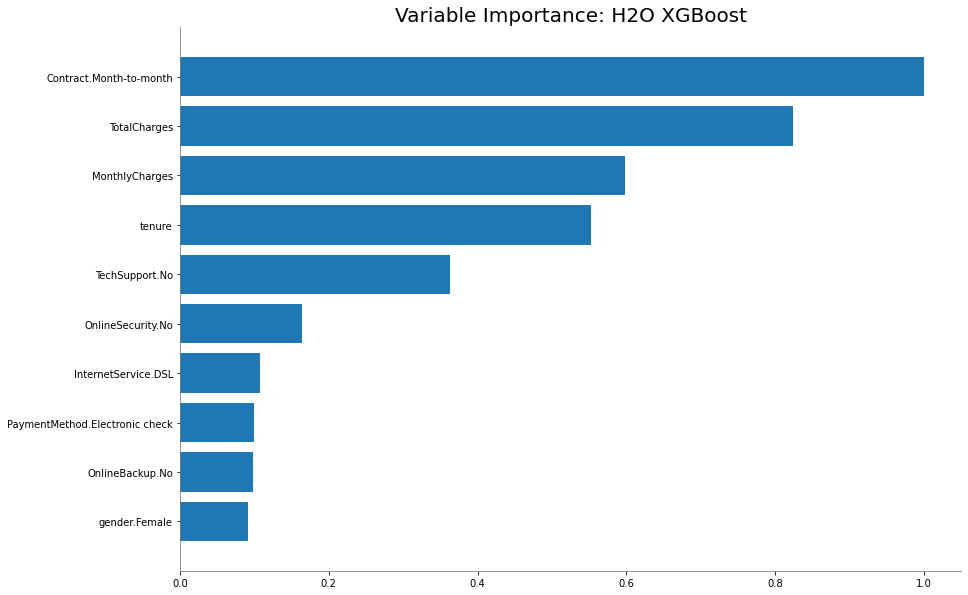

In [31]:
out.varimp_plot()

In [32]:
aml.leader.download_mojo(path = "./")

'/content/GLM_1_AutoML_1_20211020_63351.zip'